# openCV
## 제공하는 기능
- 이미지 형식 변환
- 크기 및 색상 변환
- 필터링, 얼굴 인식, 물체 인식, 문자 인식

In [ ]:
!python -m pip install --upgrade pip

In [1]:
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
# 이미지 읽기
!curl -L https://www.dropbox.com/s/v4225z25x0zz4y3/pool.jpg \
    -o pool.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  6 1587k    6  110k    0     0  27685      0  0:00:58  0:00:04  0:00:54 38290
100 1587k  100 1587k    0     0   368k      0  0:00:04  0:00:04 --:--:--  500k


In [7]:
img = cv2.imread("pool.jpg")

In [8]:
type(img)

numpy.ndarray

In [9]:
img.shape

(3024, 4032, 3)

#### 파이썬 함수
- min(), max(), sum()

In [10]:
img.min(), img.max()

(0, 255)

## 이미지를 그림으로 출력하기
- #### plt.imshow(img, cmap)
- #### openCV 에서는 BGR 순서로 이미지 데이터를 기록 --> RGB 순서로 변환 필요
- #### plt.axis("off") : 눈금이 나타나지 않게 한다

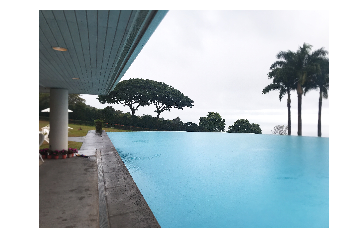

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Negative 이미지
- #### 색상값을 반전 처리 : 255 - img

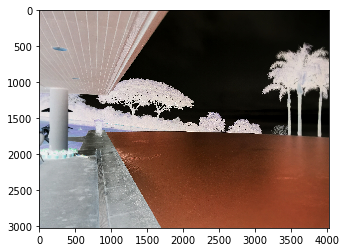

In [13]:
# 반전(네거티브) 처리
img2 = 255 - img
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

### Gray 이미지로 변환
- #### cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

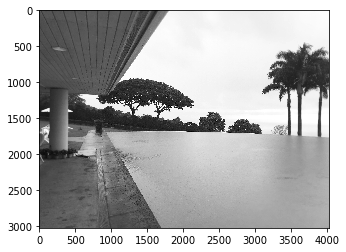

In [14]:
# 그레이로 변환
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

### 파이썬 startswith () 메소드
- 시작 부분에 서브 문자열을 지정 여부를 확인하는 데 사용
- True / False 반환 

In [62]:
[i for i in dir(cv2) if i.startswith('COLOR_')][:3]

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']

In [63]:
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

array([[ 83,  83,  84, ..., 254, 254, 254],
       [ 83,  83,  84, ..., 254, 254, 254],
       [ 83,  83,  83, ..., 254, 254, 254],
       ...,
       [ 82,  81,  81, ..., 160, 160, 160],
       [ 81,  81,  81, ..., 160, 159, 159],
       [ 81,  81,  81, ..., 160, 159, 158]], dtype=uint8)

### 좌우 반전하기
- #### cv2.flip(img, 1)
    - 1 : 좌우 반전
    - 0 : 상하 반전

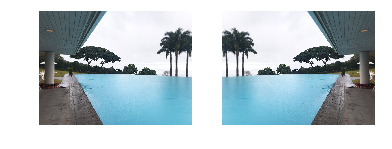

In [15]:
# 좌우 반전하기

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img2 = cv2.flip(img, 1)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

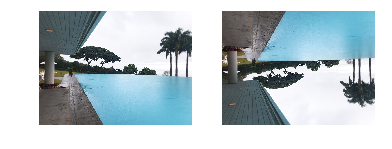

In [16]:
# 상하 반전하기

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img2 = cv2.flip(img, 0)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## 저장하기
- #### cv2.imwrite("pool_2.jpg", img)

In [17]:
cv2.imwrite("pool_2.jpg", img)

True

## 이미지 크기(폭, 높이) 조정 

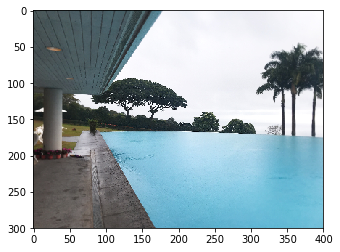

In [18]:
# 폭과 높이 조정
im2 = cv2.resize(img, (400, 300))

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

## 이미지의 일부만 잘라 내기
- #### 이미지의 원하는 부분에 해당하는 위치를 준다.

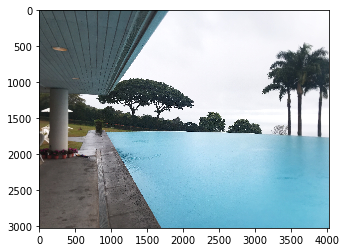

In [68]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

In [69]:
img.shape

(3024, 4032, 3)

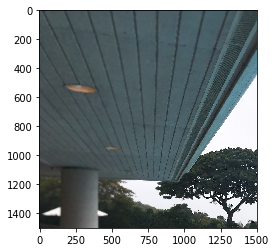

In [19]:
im2 = img[0:1500, 0:1500]

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

### (주의)  image data는 아직 ndarray 타입이다.
- #### img[인덱스, 컬럼], [y, x] 형태로 다뤄야~

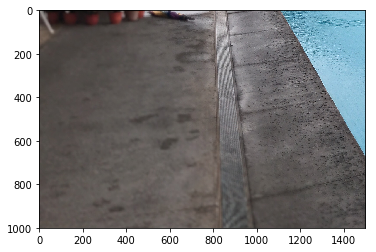

In [72]:
im2 = img[2000:3000, 0:1500]

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

# 얼굴을 검출하는 기능
- Haar-like 특징 학습기 사용 
- 사람 얼굴에는 공통된 특징 : 눈, 코, 입 부분의 명암의 패턴을 인식
- 얼굴 특징에 대한 데이터베이스인 캐스케이드 파일 필요 (haarcascade 검색하면 됨)
- https://github.com/opencv/opencv/tree/master/data/haarcascades

### Cascade 파일 다운로드

In [20]:
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \
    -o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   170  100   170    0     0   1650      0 --:--:-- --:--:-- --:--:--  1650

  1  660k    1 12956    0     0  23012      0  0:00:29 --:--:--  0:00:29 23012
100  660k  100  660k    0     0   647k      0  0:00:01  0:00:01 --:--:-- 1421k


In [21]:
# !ls -al ha*
!dir -al ha*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 06EE-9B02

 C:\Users\user\MyLab 디렉터리


 C:\Users\user\MyLab 디렉터리

2019-08-28  오후 04:41           676,709 haar.xml
               1개 파일             676,709 바이트
               0개 디렉터리  171,881,656,320 바이트 남음


### 캐스케이드 파일 지정해서 검출기 생성
- #### cv2.CascadeClassifier(cascade_file)
    - haar feature 기반 cascade 분류기(학습)

In [26]:
import cv2

In [27]:
cascade = cv2.CascadeClassifier(cascade_file)

NameError: name 'cascade_file' is not defined

### 이미지를 읽어 들이고 그레이스케일로 변환
- #### https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg

In [23]:
!curl -L https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg -o families.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0 1733k    0 15335    0     0   6073      0  0:04:52  0:00:02  0:04:50 29209
 47 1733k   47  814k    0     0   226k      0  0:00:07  0:00:03  0:00:04  510k
 80 1733k   80 1390k    0     0   299k      0  0:00:05  0:00:04  0:00:01  527k
100 1733k  100 1733k    0     0   364k      0  0:00:04  0:00:04 --:--:--  629k


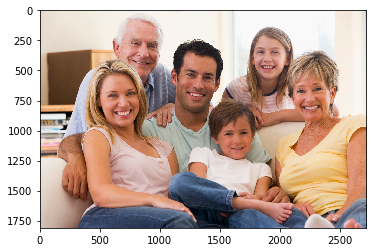

In [24]:
img = cv2.imread("families.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 얼굴 인식하기
- #### 얼굴 인식 프로그램이 color 기반이 아니므로 gray scale로 변환해야
- #### detectMultiScale(image, minSize, maxSize)
    - minSize : 검출하려는 이미지의 최소 사이즈, 이 보다 작은 object는 무시
    - maxSize : 검출하려는 이미지의 최대 사이즈, 이 보다 큰 object는 무시
    - The detected objects are returned as a list of rectangles.

In [25]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

NameError: name 'cascade' is not defined

### 인식 결과 확인하기
- #### face_list : a list of rectangles

In [80]:
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()

### 인식한 부분 표시하기
- rectangle : (x, y, width, height)

In [81]:
face_list

array([[ 676,  144,  381,  381],
       [1736,  231,  313,  313],
       [1472,  906,  322,  322],
       [2065,  535,  352,  352],
       [ 482,  551,  396,  396],
       [1126,  393,  401,  401]], dtype=int32)

얼굴의 좌표 = 676 144 381 381
얼굴의 좌표 = 1736 231 313 313
얼굴의 좌표 = 1472 906 322 322
얼굴의 좌표 = 2065 535 352 352
얼굴의 좌표 = 482 551 396 396
얼굴의 좌표 = 1126 393 401 401


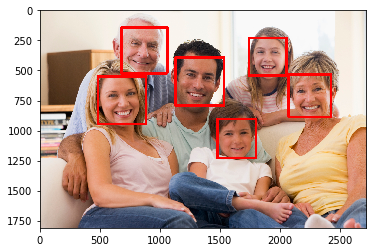

In [82]:
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 파일 출력하기
cv2.imwrite("face-detect.png", img)

# 이미지 화면 출력하기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [83]:
x, y, w, h

(1126, 393, 401, 401)

### 제일 마지막 인식 결과만 배열 데이터에서 처리하여 일부만 잘라내어서 저장
#### (주의)  image data는 아직 ndarray 타입이다.
- #### img[인덱스, 컬럼], [y, x] 형태로 다뤄야~

In [84]:
# slice = img_gray[x:x+w, y:y+h]
slice = img_gray[y:y+h, x:x+w]
cv2.imwrite("face-pickup.png", slice)

True

### 그레이 이미지로 출력하기

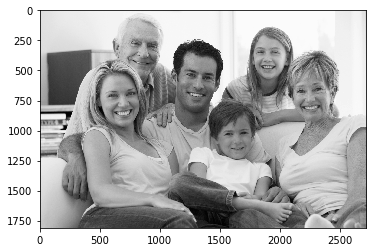

In [85]:
plt.imshow(img_gray, cmap="gray")
plt.show()

### 얼굴 부분을 모자이크 처리

In [86]:
def mosaic(img, rect, size):
    
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]    # 지금은 배열(ndarray) - y(index), x(column)
    
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    
    return img2

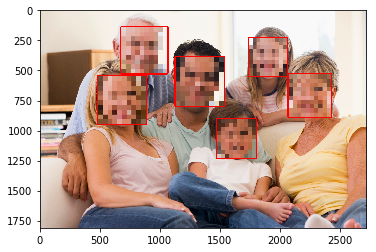

In [87]:
# 얼굴 부분만 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()